Create a new Python application

In [1]:
# Azure의 커스텀 비전 라이브러리 - 예측을 위해 prediction을 포함함
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
# OpenAPI 스펙에 맞춰서 Authentication을 처리할 수 있도록 해주는 코드
from msrest.authentication import ApiKeyCredentials
# 결과 시각화
from matplotlib import pyplot as plt
# 이미지 그리기
from PIL import Image, ImageDraw, ImageFont
# (이젠 거의 기본 옵션인) 넘파이
import numpy as np
# 파일 처리 작업을 위해 os 라이브러리 임포트
import os

Create variables for your resource's Azure endpoint and keys.

In [ ]:
prediction_endpoint = ""  # 예측 엔드포인트 URL
prediction_key = ""  # 예측 키
project_id = ""  # 프로젝트 ID
model_name = "Iteration1" # 모델명 (대소문자 구분 필수. 띄어쓰기 없이 기재해야 함)

Authenticate the client

In [3]:
credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(endpoint=prediction_endpoint, credentials=credentials)

Load image and get height, width and channels

In [4]:
image_file = "./data/test-1.png"
print(f'Detecting objects in {image_file}')

image = Image.open(image_file)
h, w, ch = np.array(image).shape  # 높이, 폭, 채널 읽기


print(h)
print(w)
print(ch)

Detecting objects in ./data/test-1.png
791
1410
3


Detect objects in the test image

In [5]:
with open(image_file, mode="rb") as image_data:
    results = predictor.detect_image(project_id, model_name, image_data)

# Display the results.
# bounding box: 비율값
for prediction in results.predictions:
    print("\t" + prediction.tag_name + \
          ": {0:.2f}% bbox.left = {1:.2f}, bbox.top = {2:.2f}, bbox.width = {3:.2f}, bbox.height = {4:.2f}".format(prediction.probability * 100, \
          prediction.bounding_box.left, prediction.bounding_box.top, prediction.bounding_box.width, prediction.bounding_box.height))

	Bungee: 99.75% bbox.left = 0.04, bbox.top = 0.33, bbox.width = 0.65, bbox.height = 0.61
	Bungee: 31.94% bbox.left = 0.59, bbox.top = 0.31, bbox.width = 0.41, bbox.height = 0.69
	Bungee: 21.54% bbox.left = 0.02, bbox.top = 0.15, bbox.width = 0.63, bbox.height = 0.85
	Bungee: 10.44% bbox.left = 0.00, bbox.top = 0.02, bbox.width = 0.13, bbox.height = 0.50
	Bungee: 1.50% bbox.left = 0.04, bbox.top = 0.33, bbox.width = 0.36, bbox.height = 0.67
	Bungee: 1.01% bbox.left = 0.75, bbox.top = 0.90, bbox.width = 0.25, bbox.height = 0.10


Create a figure for the results
Display the image with boxes around each detected object

Results saved in output.jpg


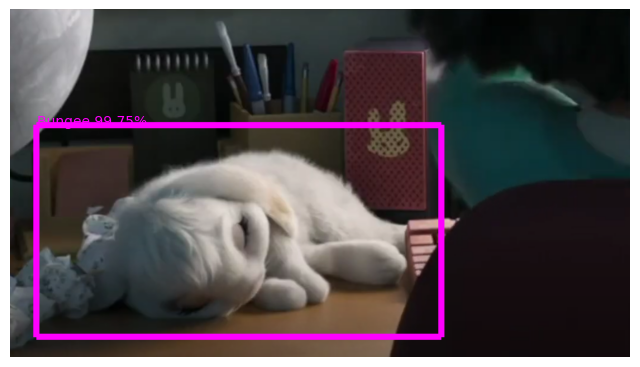

In [7]:
fig = plt.figure(figsize=(8, 8))
plt.axis('off')

draw = ImageDraw.Draw(image)
lineWidth = int(w / 100)
color = 'magenta'

for prediction in results.predictions:
    if (prediction.probability * 100) > 50:
        left = prediction.bounding_box.left * w
        top = prediction.bounding_box.top * h
        width = prediction.bounding_box.width * w
        height = prediction.bounding_box.height * h
        
        points = ((left, top), (left + width, top), (left + width, top + height), (left, top + height), (left, top))
        draw.line(points, fill=color, width=lineWidth)
        plt.annotate(prediction.tag_name + ' {0:.2f}%'.format(prediction.probability * 100), (left, top), color=color)
        
plt.imshow(image)
outputfile = 'output.jpg'
fig.savefig(outputfile)
print('Results saved in', outputfile)